In [ ]:
# Porte CSWAP :
#
# La porte agit sur trois qubits
# La porte applique la fonction SWAP sur deux qbits uniquement si le 3ème qubit de contrôle est sur 1.
#
#      
# CSWAP =  | 1 0 0 0 0 0 0 0|
#          | 0 1 0 0 0 0 0 0|
#          | 0 0 1 0 0 0 0 0|
#          | 0 0 0 1 0 0 0 0|
#          | 0 0 0 0 1 0 0 0|
#          | 0 0 0 0 0 0 1 0|
#          | 0 0 0 0 0 1 0 0|
#          | 0 0 0 0 0 0 0 1|
#
# La matrice de passage est :
#
#
# H =  | 1 0 0 0 0 0 0 0|
#      | 0 1 0 0 0 0 0 0|
#      | 0 0 1 0 0 0 0 0|
#      | 0 0 0 1 0 0 0 0|
#      | 0 0 0 0 1 0 0 0|
#      | 0 0 0 0 0 1 0 1|
#      | 0 0 0 0 0 0 0 1|
#      | 0 0 0 0 0 0 1 0|
#
# Suivant la matrice : diag(1,1,1,1,1,1,1,-1)
#

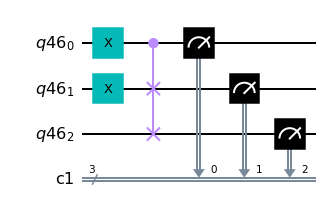

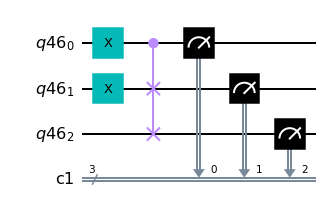

In [8]:
import numpy as np
from qiskit import(
QuantumCircuit,
ClassicalRegister,
QuantumRegister,
execute,
BasicAer)

import matplotlib as ptl

n = 3

q = QuantumRegister(3)
c = ClassicalRegister(3)

# quantum circuit to make a Bell state
bell = QuantumCircuit(q,c)
bell.x([q[0],q[1]])
bell.cswap(0,1,2)
bell.measure(q,c)

bell.draw(output='mpl')

In [9]:
# execute the quantum circuit
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
result = execute(bell, backend, shots=1000).result()
counts  = result.get_counts(bell)
print(counts)

{'101': 1000}


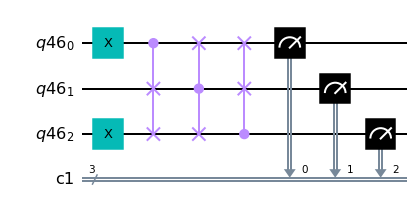

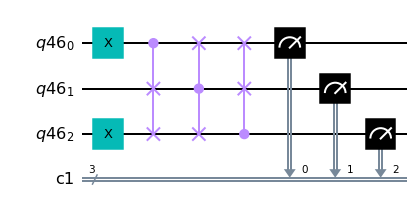

In [10]:
# quantum circuit to make a Bell state
bell2 = QuantumCircuit(q,c)
bell2.x([q[0],q[1]])
bell2.cswap(0,1,2)
bell2.cswap(1,2,0)
bell2.cswap(2,0,1)
bell2.measure(q,c)

bell2.draw(output='mpl')

In [11]:
# execute the quantum circuit
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
result = execute(bell2, backend, shots=1000).result()
counts  = result.get_counts(bell2)
print(counts)

{'101': 1000}


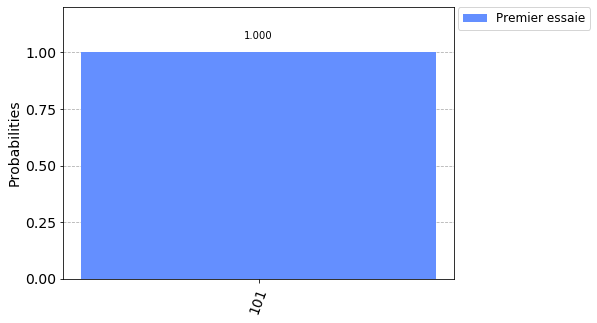

In [12]:
from qiskit.visualization import plot_histogram

hist = plot_histogram([counts], legend=['Premier essaie'])

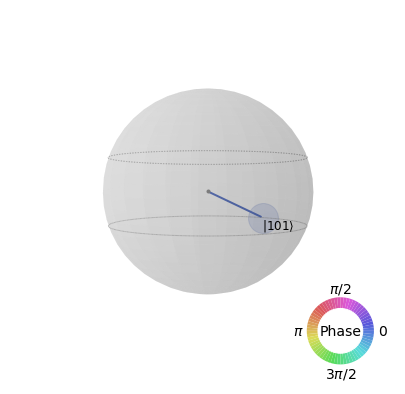

In [13]:
from qiskit.visualization import plot_state_qsphere
# execute the quantum circuit
backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result = execute(bell, backend).result()
psi  = result.get_statevector(bell)
plot_state_qsphere(psi)

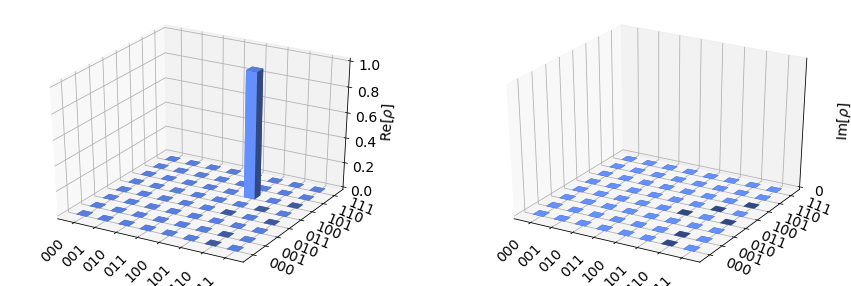

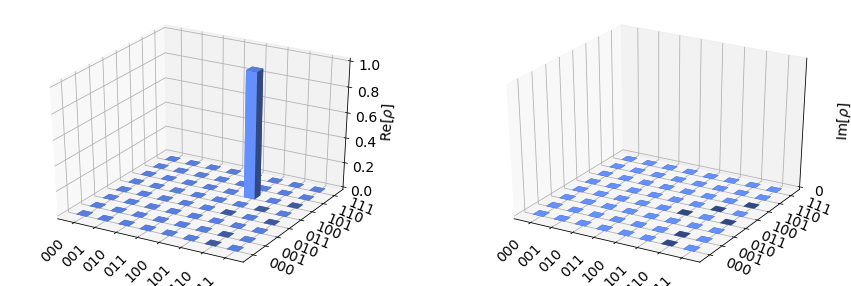

In [14]:
from qiskit.visualization import plot_state_city

plot_state_city(psi)